In [1]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 6.8 MB/s eta 0:00:49
   ---------------------------------------- 3.1/332.0 MB 13.7 MB/s eta 0:00:24
    --------------------------------------- 4.2/332.0 MB 9.0 MB/s eta 0:00:37
    --------------------------------------- 6.0/332.0 MB 9.5 MB/s eta 0:00:35
    --------------------------------------- 6.8/332.0 MB 7.3 MB/s eta 0:00:45
    --------------------------------------- 7.9/332.0 MB 6.9 MB/s eta 0:00:47
   - -------------------------------------- 9.2/332.0 MB 6.7 MB/s eta 0:00:49
   - -------------------------------------- 10.2/332.0 MB 6.5 MB/s eta 0:00:50
   - -------------------------------------- 10.5/332.0 MB 6.1 MB/s eta 0:00:53
   - -------------------------------------- 11.0/332.0 MB 5.5 MB/s eta 0:00:58
   - -------------------------------------- 11.3/332.0 MB 5.1 MB/s eta 0:01:04
   - -------------------------------------- 11.5/332.0 MB 4.7 MB/s

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
#loading dataset
(X_train,y_train),(X_test, y_test) = mnist.load_data()
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [6]:
#preprocessing
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding for CNN
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

In [7]:
#CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=5,
    validation_split=0.2,
    batch_size=64
)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9399 - loss: 0.2028 - val_accuracy: 0.9778 - val_loss: 0.0748
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9819 - loss: 0.0614 - val_accuracy: 0.9818 - val_loss: 0.0582
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9831 - val_loss: 0.0561
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9852 - val_loss: 0.0511
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9849 - val_loss: 0.0527


In [8]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print("CNN Accuracy:", cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9846 - loss: 0.0494
CNN Accuracy: 0.9846000075340271


In [9]:
#Logistic Regression Model# 
#Flatten images
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_flat, y_train)

y_pred_log = log_model.predict(X_test_flat)

log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)


Logistic Regression Accuracy: 0.9255


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


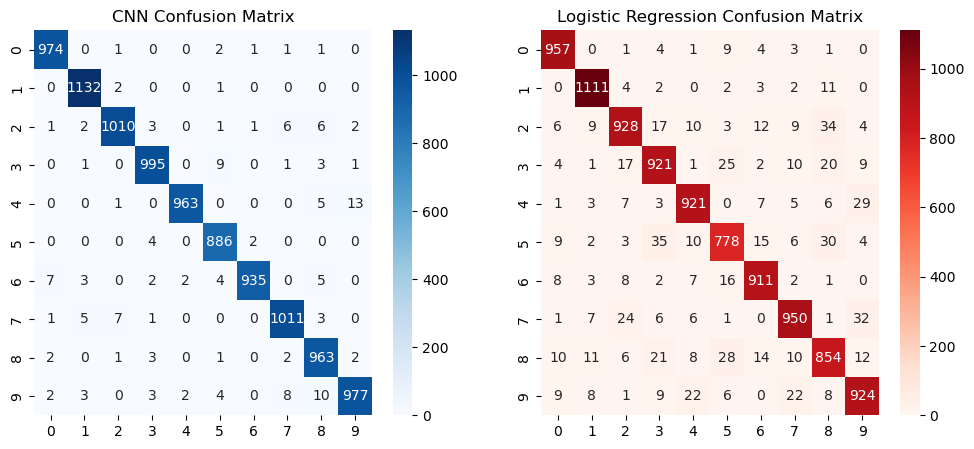

In [10]:
#evaluation - confusion matrix

# CNN predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Confusion matrices
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Reds')
plt.title("Logistic Regression Confusion Matrix")

plt.show()

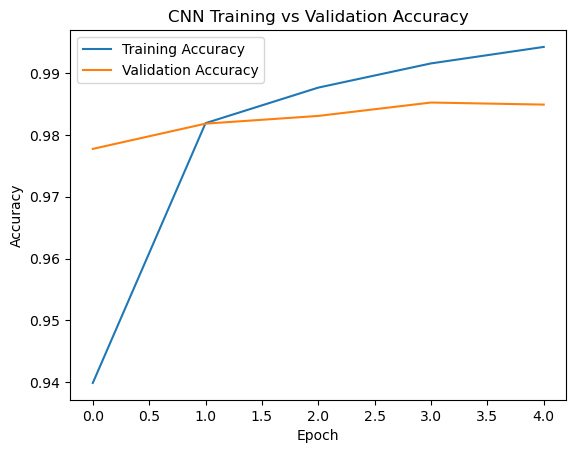

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
print("Model Comparison:")
print("CNN Accuracy:", cnn_accuracy)
print("Logistic Regression Accuracy:", log_accuracy)

Model Comparison:
CNN Accuracy: 0.9846000075340271
Logistic Regression Accuracy: 0.9255
